In [2]:
import tensorflow.compat.v1 as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

# 增加一个维度信息

In [3]:
x_train=np.expand_dims(x_train,-1)#在最后一个维度增加一个通道信息
x_test=np.expand_dims(x_test,-1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#  增加噪声

In [4]:
#噪声系数
factor=0.5
x_train_noise=x_train+factor*np.random.normal(0,1,size=x_train.shape)
x_test_noise=x_test+factor*np.random.normal(0,1,size=x_test.shape)

x_train_noise=np.clip(x_train_noise,0.,1.)#压缩数据,所有数限定到范围0(min)和1(max),0(min)：被限定的最小值，所有比0小的数都会强制变为0；
#1：被限定的最大值，所有比1大的数都会强制变为1；
x_test_noise=np.clip(x_test_noise,0.,1.)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('x_train_noise:',x_train_noise.shape)
print('x_test_noise:',x_test_noise.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
x_train_noise: (60000, 28, 28, 1)
x_test_noise: (10000, 28, 28, 1)


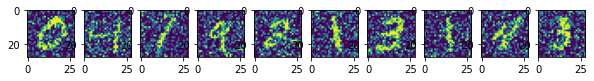

In [5]:
plt.figure(figsize=(10,2))
for i in range(1,11):#画10张图像,1从1到10
    ax=plt.subplot(1,10,i)
    plt.imshow(x_train_noise[i].reshape(28,28))

In [15]:
#encode:用卷积提取特征
input_dim=tf.keras.layers.Input(shape=x_train.shape[1:])  #形状为(28,28,1)
x=tf.keras.layers.Conv2D(16,3,activation='relu',padding='same')(input_dim)   #输出形状（28，28，16）
x=tf.keras.layers.MaxPooling2D()(x)#输出形状（14，14，16）
x=tf.keras.layers.Conv2D(32,3,activation='relu',padding='same')(x)#输出形状（14，14，32）
x=tf.keras.layers.MaxPooling2D()(x)#输出形状（7，7，32）
#decode:用反卷积上采样，还原回原来的图像
# x=tf.keras.layers.Conv2DTranspose(16,3,strides=2,activation='relu',padding='same')(x)  #输出形状（14，14，16）
# x=tf.keras.layers.Conv2DTranspose(1,3,strides=2,activation='sigmoid',padding='same')(x)#输出形状（28，28，1）
x=tf.keras.layers.Conv2DTranspose(16,3,strides=2,activation='relu',padding='same')(x)
x=tf.keras.layers.Conv2DTranspose(1,3,strides=2,activation='sigmoid',padding='same')(x)
model=tf.keras.Model(inputs=input_dim,outputs=x)

In [16]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 16)       4624

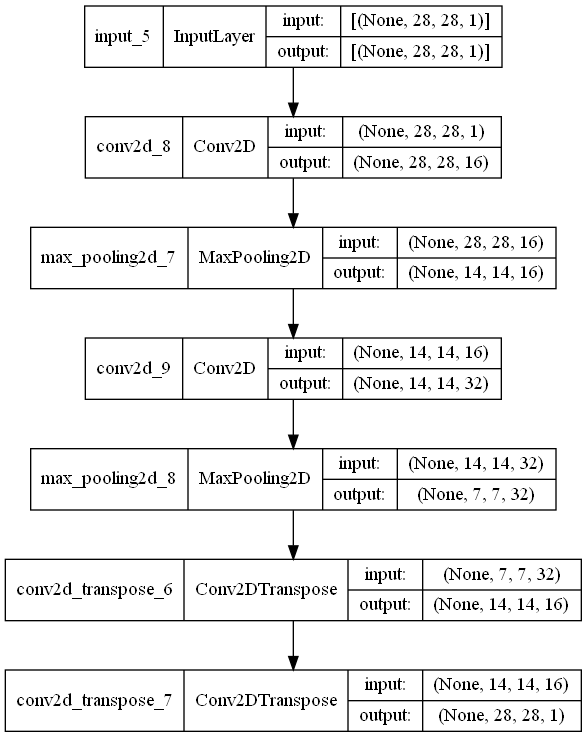

In [17]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse')

In [19]:
model.fit(x_train_noise,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test_noise,x_test))

Epoch 1/50
235/235 [==============================] - 51s 205ms/step - loss: 0.1201 - val_loss: 0.0621
Epoch 2/50
235/235 [==============================] - 43s 184ms/step - loss: 0.0326 - val_loss: 0.0217
Epoch 3/50
235/235 [==============================] - 44s 187ms/step - loss: 0.0203 - val_loss: 0.0189
Epoch 4/50
235/235 [==============================] - 47s 201ms/step - loss: 0.0185 - val_loss: 0.0178
Epoch 5/50
235/235 [==============================] - 61s 259ms/step - loss: 0.0175 - val_loss: 0.0170TA: 
Epoch 6/50
235/235 [==============================] - 45s 190ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 7/50
235/235 [==============================] - 45s 192ms/step - loss: 0.0164 - val_loss: 0.0161
Epoch 8/50
235/235 [==============================] - 39s 167ms/step - loss: 0.0161 - val_loss: 0.0157
Epoch 9/50
235/235 [==============================] - 46s 196ms/step - loss: 0.0158 - val_loss: 0.0155
Epoch 10/50
235/235 [==============================] - 46s 194ms/step

In [20]:
model.layers

In [21]:
pre_test=model.predict(x_test_noise)

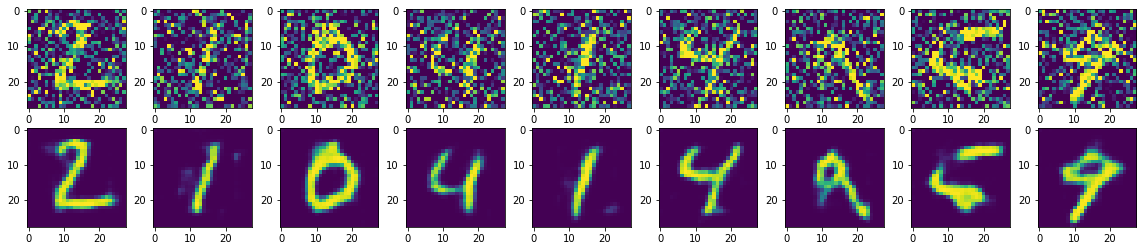

In [22]:
#画图
n=9#画两行9列的子图
plt.figure(figsize=(20,4))#宽20,高4
for i in range(1,10):
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noise[i].reshape(28,28))
    ax=plt.subplot(2,n,n+i)
    plt.imshow(pre_test[i].reshape(28,28))